# Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
import joblib
from sklearn.metrics import accuracy_score
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def datasets(path):
  df = pd.read_csv(path)
  X_text = df['text'].values
  X_title = df['title'].values
  y = df['label'].values
  return X_text, X_title, y

In [ ]:
X_text1, X_title1, y1 = datasets('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset1.csv')

In [ ]:
X_text2, X_title2, y2 = datasets('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset3.csv')

In [ ]:
X_text3, X_title3, y3 = datasets('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset_4')

# Unbiasity of datasets

In [106]:
def checking_Unbiasity(y):
    plt.figure(figsize=(7,6))
    labels = 'Fake', 'Real'
    a=0
    b=0
    for i in y:
      if i==0:
        a+=1
      else:
        b+=1
    sizes = [b,a]
    colors = ['lightcoral', 'teal']
    explode = (0.1, 0) 
    plt.rcParams['font.size'] = 18
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    plt.close()

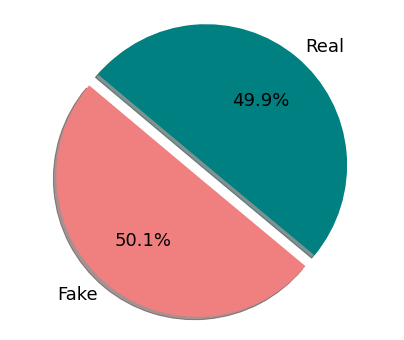

In [107]:
checking_Unbiasity(y1)

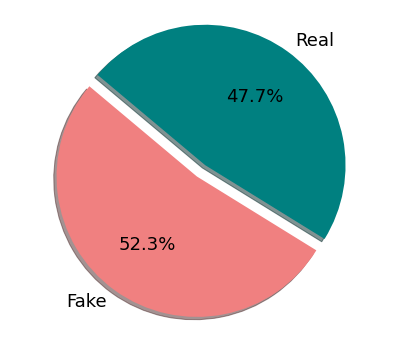

In [108]:
checking_Unbiasity(y2)

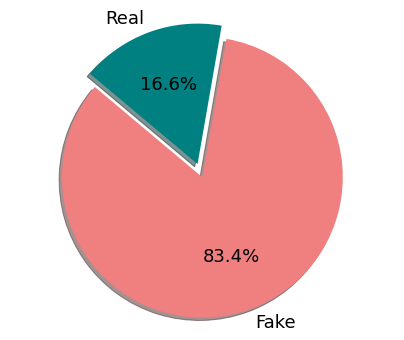

In [109]:
checking_Unbiasity(y3)

# Text Cleaning

In [ ]:
def simplify(df,y):
  corpus = []
  for i in range(0, y.size):
    review = re.sub('[^a-zA-Z0-9]', ' ', str(df[i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
  return corpus

In [ ]:
corpus1_text = simplify(X_text1, y1)
corpus1_title = simplify(X_title1, y1)

In [ ]:
# joblib.dump(corpus1_text,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset1_Text_corpus')
corpus1_text = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset1_Text_corpus')
# joblib.dump(corpus1_title,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset1_Title_corpus')
corpus1_title = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset1_Title_corpus')

In [ ]:
corpus2_text = simplify(X_text2, y2)
corpus2_title = simplify(X_title2, y2)

In [ ]:
# joblib.dump(corpus2_text,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset2_Text_corpus')
corpus2_text = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset2_Text_corpus')
# joblib.dump(corpus2_title,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset2_Title_corpus')
corpus2_title = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset2_Title_corpus')

In [ ]:
corpus3_text = simplify(X_text3, y3)
corpus3_title = simplify(X_title3, y3)

In [ ]:
# joblib.dump(corpus3_text,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset3_Text_corpus')
corpus3_text = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset3_Text_corpus')
# joblib.dump(corpus3_title,'/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset3_Title_corpus')
corpus3_title = joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Dataset3_Title_corpus')

In [ ]:
def counting_vector(X_train, X_test):
  cv = CountVectorizer(max_features = 5000, ngram_range=(1,2))
  X_train = cv.fit_transform(X_train).toarray()
  X_test = cv.transform(X_test).toarray()
  return X_train, X_test

In [ ]:
def model(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  return acc

In [ ]:
X_train_text1, X_test_text1, y_train_text1, y_test_text1 = train_test_split(corpus1_text, y1, test_size=0.3, random_state=42)

In [ ]:
X_train_text1, X_test_text1 = counting_vector(X_train_text1, X_test_text1)

In [ ]:
def plotting_accuracies(test_accuracy_text,test_accuracy_title,test_accuracy_tt):
  l=[test_accuracy_text,test_accuracy_title,test_accuracy_tt]
  l2=['Text','Title','Text+Title']
  d1={'Accuracy':l,'Variation':l2}
  d1=pd.DataFrame(d1)
  import plotly.express as px

  fig = px.bar(d1, y='Accuracy', x='Variation', text='Accuracy',color='Variation',title='Accuracy Analysis on Dataset1')
  fig.update_traces(texttemplate='%{text}', textposition='outside')
  fig.show()

# Logistic Regression

## Dataset1

In [ ]:
clf = LR(max_iter=1000)
acc_LR = model(clf, X_train_text1, y_train_text1, X_test_text1, y_test_text1)
print(acc_LR)

0.9503205128205128


In [ ]:
# joblib.dump(acc_LR, '/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D1')
acc_LR=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D1')

In [ ]:
text_title_1 = pd.DataFrame(zip(corpus1_text, corpus1_title))

In [ ]:
text_title_1.columns = ['text', 'title']

In [ ]:
text_title_1 = text_title_1['text'].str.cat(text_title_1['title'], sep =" ")
text_title_1 = text_title_1.iloc[:].values

In [ ]:
X_train_tt1, X_test_tt1, y_train_tt1, y_test_tt1 = train_test_split(text_title_1, y1, test_size=0.3, random_state=42)

In [ ]:
X_train_tt1, X_test_tt1 = counting_vector(X_train_tt1, X_test_tt1)

In [ ]:
clf = LR(max_iter=1000)
acc_LR_tt = model(clf, X_train_tt1, y_train_tt1, X_test_tt1, y_test_tt1)
print(acc_LR_tt)

0.9602564102564103


In [ ]:
#joblib.dump(acc_LR_tt, '/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_TT_D1')
acc_LR_tt=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_TT_D1')

In [ ]:
X_train_title1, X_test_title1, y_train_title1, y_test_title1 = train_test_split(corpus1_title, y1, test_size=0.3, random_state=42)

In [ ]:
X_train_title1, X_test_title1 = counting_vector(X_train_title1, X_test_title1)

In [ ]:
clf = LR(max_iter=1000)
acc_LR_title = model(clf, X_train_title1, y_train_title1, X_test_title1, y_test_title1)
print(acc_LR_title)

0.9363782051282051


In [ ]:
# joblib.dump(acc_LR_title,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D1')
acc_LR_title=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D1')

Visualization of Performance DataSet 1

In [ ]:
plotting_accuracies(acc_LR, acc_LR_title, acc_LR_tt)

## Dataset2

In [ ]:
X_train_text2, X_test_text2, y_train_text2, y_test_text2 = train_test_split(corpus2_text, y2, test_size=0.3, random_state=42)

In [ ]:
X_train_text2, X_test_text2 = counting_vector(X_train_text2, X_test_text2)

In [ ]:
clf = LR(max_iter=5000)
acc_LR2 = model(clf, X_train_text2, y_train_text2, X_test_text2, y_test_text2)
print(acc_LR2)
# joblib.dump(acc_LR2, '/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D2')

0.9951744617668894


In [ ]:
acc_LR2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D2')

In [ ]:
X_train_title2, X_test_title2, y_train_title2, y_test_title2 = train_test_split(corpus2_title, y2, test_size=0.3, random_state=42)

In [ ]:
X_train_title2, X_test_title2 = counting_vector(X_train_title2, X_test_title2)

In [ ]:
clf = LR(max_iter=5000)
acc_LR_title2 = model(clf, X_train_title2, y_train_title2, X_test_title2, y_test_title2)
print(acc_LR_title2)
# joblib.dump(acc_LR_title2,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D2')

0.9496659242761692


In [ ]:
acc_LR_title2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D2')

In [ ]:
text_title_2 = pd.DataFrame(zip(corpus2_text, corpus2_title))
text_title_2.columns = ['text', 'title']
text_title_2 = text_title_2['text'].str.cat(text_title_2['title'], sep =" ")
text_title_2 = text_title_2.iloc[:].values

In [ ]:
X_train_tt2, X_test_tt2, y_train_tt2, y_test_tt2 = train_test_split(text_title_2, y2, test_size=0.3, random_state=42)

In [ ]:
X_train_tt2, X_test_tt2 = counting_vector(X_train_tt2, X_test_tt2)

In [ ]:
acc_LR_tt2 = model(clf, X_train_tt2, y_train_tt2, X_test_tt2, y_test_tt2)
print(acc_LR_tt2)

0.9958426132145508


In [ ]:
# joblib.dump(acc_LR_tt2,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_TT_D2')
acc_LR_tt2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_TT_D2')

In [ ]:
plotting_accuracies(acc_LR2, acc_LR_title2, acc_LR_tt2)

## Dataset3 Biased one

In [ ]:
X_train_text3, X_test_text3, y_train_text3, y_test_text3 = train_test_split(corpus3_text, y3, test_size=0.3, random_state=42)

In [ ]:
X_train_text3, X_test_text3 = counting_vector(X_train_text3, X_test_text3)

In [ ]:
clf = LR(max_iter=5000)
acc_LR3 = model(clf, X_train_text3, y_train_text3, X_test_text1, y_test_text1)
print(acc_LR3)
# joblib.dump(acc_LR3, '/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D3')

0.5439102564102564


In [ ]:
acc_LR3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_D3')

In [ ]:
X_train_title3, X_test_title3, y_train_title3, y_test_title3 = train_test_split(corpus3_title, y3, test_size=0.3, random_state=42)

In [ ]:
X_train_title3, X_test_title3 = counting_vector(X_train_title3, X_test_title3)

In [ ]:
clf = LR(max_iter=5000)
acc_LR_title3 = model(clf, X_train_title3, y_train_title3, X_test_title1, y_test_title1)
print(acc_LR_title3)

0.49423076923076925


In [ ]:
# joblib.dump(acc_LR_title3,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D3')
acc_LR_title3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Title_D3')

In [ ]:
text_title_3 = pd.DataFrame(zip(corpus3_text, corpus3_title))
text_title_3.columns = ['text', 'title']
text_title_3 = text_title_3['text'].str.cat(text_title_3['title'], sep =" ")
text_title_3 = text_title_3.iloc[:].values

In [ ]:
X_train_tt3, X_test_tt3, y_train_tt3, y_test_tt3 = train_test_split(text_title_3, y3, test_size=0.3, random_state=42)

In [ ]:
X_train_tt3, X_test_tt3 = counting_vector(X_train_tt3, X_test_tt3)

In [ ]:
clf = LR(max_iter=5000)
acc_LR_tt3 = model(clf, X_train_tt3, y_train_tt3, X_test_tt1, y_test_tt1)
print(acc_LR_tt3)

0.5152243589743589


In [ ]:
# joblib.dump(acc_LR_tt3,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Tt_D3')
acc_LR_tt3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_LR_Tt_D3')

In [ ]:
plotting_accuracies(acc_LR3, acc_LR_title3, acc_LR_tt3)

# Comparison Of Accuracies among Datasets

In [ ]:
import plotly.graph_objects as go

In [ ]:
l = [acc_LR,acc_LR_title,acc_LR_tt]
l1 = [acc_LR2,acc_LR_title2,acc_LR_tt2]
l2=['Text','Title','Text+Title']
l3 = [acc_LR3,acc_LR_title3,acc_LR_tt3]
fig = go.Figure(data=[
    go.Bar(name='Dataset1', x=l2, y=l,text=l,opacity=0.98),
    go.Bar(name='Dataset2', x=l2, y=l1,text=l1,opacity=0.98),
    go.Bar(name='Biased Dataset', x=l2, y=l3,text=l3,opacity=0.98)
])
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_text='Accuracy Comparision on Datasets')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
l2=['Dataset1','Dataset2','Biased Dataset']
import plotly.express as px

In [ ]:
def plotting_accuracies_datasets(test_accuracy_text,test_accuracy_title,test_accuracy_tt):
  l=[test_accuracy_text,test_accuracy_title,test_accuracy_tt]
  d1={'Accuracy':l,'Variation':l2}
  d1=pd.DataFrame(d1)
  fig = px.bar(d1, y='Accuracy', x='Variation', text='Accuracy',color='Variation',title='Accuracy Analysis on Datasets')
  fig.update_traces(texttemplate='%{text}', textposition='outside')
  fig.show()

# SVM on Text+Title

In [ ]:
clf = SVC()
acc_svm_tt1 = model(clf, X_train_tt1, y_train_tt1, X_test_tt1, y_test_tt1)
print(acc_svm_tt1) 

0.9532051282051283


In [ ]:
# joblib.dump(acc_svm_tt1,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D1')
acc_svm_tt1=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D1')

In [ ]:
clf = SVC()
acc_svm_tt2 = model(clf, X_train_tt2, y_train_tt2, X_test_tt2, y_test_tt2)
print(acc_svm_tt2)
# joblib.dump(acc_svm_tt2,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D2')

0.9928730512249443


In [ ]:
acc_svm_tt2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D2')

In [ ]:
clf = SVC()
acc_svm_tt3 = model(clf, X_train_tt3, y_train_tt3, X_test_tt1, y_test_tt1)
print(acc_svm_tt3)
# joblib.dump(acc_svm_tt3,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D3')

0.49567307692307694


In [ ]:
acc_svm_tt3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_svm_TT_D3')

In [ ]:
plotting_accuracies_datasets(acc_svm_tt1, acc_svm_tt2, acc_svm_tt3)

# Multinomial Naive Bayes on Text+Title

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MNB
clf = MNB(alpha=1)
acc_mnb_tt1 = model(clf, X_train_tt1, y_train_tt1, X_test_tt1, y_test_tt1)
print(acc_mnb_tt1)

0.9049679487179487


In [ ]:
# joblib.dump(acc_mnb_tt1,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D1')
acc_mnb_tt1=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D1')

In [ ]:
clf = MNB(alpha=1)
acc_mnb_tt2 = model(clf, X_train_tt2, y_train_tt2, X_test_tt2, y_test_tt2)
print(acc_mnb_tt2)

0.9508537490720119


In [ ]:
# joblib.dump(acc_mnb_tt2,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D2')
acc_mnb_tt2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D2')

In [ ]:
clf = MNB(alpha=1)
acc_mnb_tt3 = model(clf, X_train_tt3, y_train_tt3, X_test_tt1, y_test_tt1)
print(acc_mnb_tt3)

0.49150641025641023


In [ ]:
# joblib.dump(acc_mnb_tt3,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D3')
acc_mnb_tt3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_mnb_TT_D3')

In [ ]:
plotting_accuracies_datasets(acc_mnb_tt1, acc_mnb_tt2, acc_mnb_tt3)

# GradientBoostingClassifier on Text+Title

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
acc_gbc_tt1 = model(clf, X_train_tt1, y_train_tt1, X_test_tt1, y_test_tt1)
print(acc_gbc_tt1)

0.9649038461538462


In [ ]:
# joblib.dump(acc_gbc_tt1,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D1')
acc_gbc_tt1=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D1')

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
acc_gbc_tt2 = model(clf, X_train_tt2, y_train_tt2, X_test_tt2, y_test_tt2)
print(acc_gbc_tt2)
# joblib.dump(acc_gbc_tt2,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D2')

0.9953971789161099


In [ ]:
acc_gbc_tt2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D2')

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
acc_gbc_tt3 = model(clf, X_train_tt3, y_train_tt3, X_test_tt1, y_test_tt1)

In [ ]:
# joblib.dump(acc_gbc_tt3,'/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D3')
acc_gbc_tt3=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Acc_gbc_TT_D3')

In [ ]:
print(acc_gbc_tt3)

0.5121794871794871


In [ ]:
plotting_accuracies_datasets(acc_gbc_tt1, acc_gbc_tt2, acc_gbc_tt3)

In [ ]:
l=[acc_gbc_tt1,acc_gbc_tt2,acc_gbc_tt3]
l1=[acc_LR_tt,acc_LR_tt2,acc_svm_tt3]
l3=[acc_mnb_tt1,acc_mnb_tt2,acc_mnb_tt3]
l4=[acc_svm_tt1,acc_svm_tt2,acc_svm_tt3]
fig = go.Figure(data=[
    go.Bar(name='Gradient Boosting', x=l2, y=l,text=l,opacity=0.98),
    go.Bar(name='Logistic Regression', x=l2, y=l1,text=l1,opacity=0.98),
    go.Bar(name='Navie Bayes', x=l2, y=l3,text=l3,opacity=0.98),
    go.Bar(name='SVM', x=l2, y=l4,text=l4,opacity=0.98)
])
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_text='Accuracy Comparision on Datasets')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
def plotacc(l,t,d3):
  if d3==0:
   l2=['Gradient Boosting','Logistic Regression','Navie Bayes','SVM','BiLSTM']
  else:
    l2=['Gradient Boosting','Logistic Regression','Navie Bayes','SVM']
  d1={'Accuracy':l,'Variation':l2}
  d1=pd.DataFrame(d1)
  fig = px.bar(d1, y='Accuracy', x='Variation', text='Accuracy',color='Variation',title=t,width=800, height=500)
  fig.update_traces(texttemplate='%{text}', textposition='outside')
  fig.show()

In [ ]:
acc_blstm_tt1=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Accuracy_BLSTM_D1_tt')
acc_blstm_tt2=joblib.load('/content/drive/MyDrive/Group5_MLProject_EndSem/Accuracy_BLSTM_D2_tt')

In [ ]:
lt1=[acc_gbc_tt1,acc_LR_tt,acc_mnb_tt1,acc_svm_tt1,acc_blstm_tt1]
lt2=[acc_gbc_tt2,acc_LR_tt2,acc_mnb_tt2,acc_svm_tt2,acc_blstm_tt2]
lt3=[acc_gbc_tt3,acc_LR_tt3,acc_mnb_tt3,acc_svm_tt3]
t1='Accuracy on Dataset 1'
t2='Accuracy on Dataset 2'
t3='Accuracy on Dataset 3'
plotacc(lt1,t1,0)
plotacc(lt2,t2,0)
plotacc(lt3,t3,1)